### Linear Regression
- Since, training set in supervised learning model includes both input features and output targets.
- Then, after feeding this training set to our learning algorithm, it will produce a function(f).
- This function f is called **Hypothesis** or **Model**.
- The job with f is to take a new input feature called x and output an estimate or a prediction which is called ŷ. (Remember, y is the actual true value or the target variable in the training set.) (ŷ != y)

### How to compute or represent f ??
Let it be straight line as of now. Then, it can be represented as;
$$
f𝓌,ᵦ (x) = wx + b
$$
or
$$
f (x) = wx + b
$$

For Example: Below is an example of linear regression model using a dataset of [Diabeties Patients](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
import pandas as pd

# Load the diabetes data
x, y = datasets.load_diabetes(return_X_y=True)

# Print the shape of the data and the first row
print(x.shape)

/home/friday_code/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


(442, 10)


In [2]:
# Extract the column at index 2
X = x[:, 2]
print(X.shape)

# Reshape to a 2D Array 
X = X.reshape((-1, 1))
print(X.shape)

(442,)
(442, 1)


In [3]:
# Split data into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33)

print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(146, 1)
(146,)
(296, 1)
(296,)


In [4]:
# Create the linear regression model and train it with our data
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Predict using our test data
y_pred = model.predict(X_test)

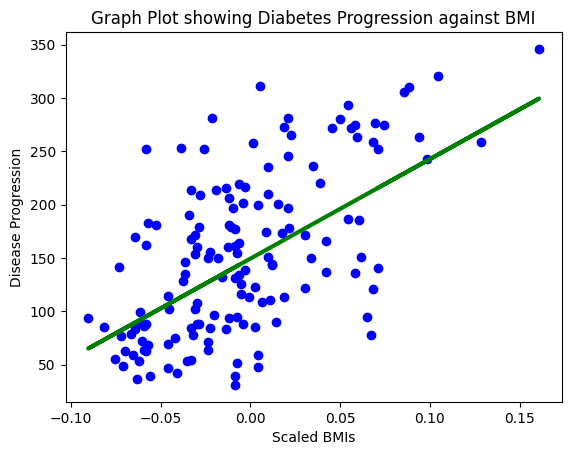

In [6]:
# Create a scatter plot
plt.scatter(X_test, y_test, color='blue')

# Plot the predictions
plt.plot(X_test, y_pred, color='green', linewidth=3)

# Add labels and titles
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('Graph Plot showing Diabetes Progression against BMI')

# Draw the Plot
plt.show()

### Implementation of Linear Regression without using external libraries

#### Terminologies
1. x -> Input variable/feature
2. y -> Output/Target variable/feature
3. m -> Total no. of training examples in training set

#### Cost Function (Also, called Squared Error Cost Function)
It will tell how good or bad our model is doing, so that we can try to make it better.
$$
J(w,b) = \frac{1}{2m}\sum_{i = 1}^{m}{(\hat{y}^{(i)} - y^{(i)})^{2}}
$$

Here,
- $\hat{y}^{(i)}$ -> i<sup>th</sup> Predicted Value
- $y^{(i)}$ -> i<sup>th</sup> Target Value

#### Linear Regression Model
$$
f (x) = wx + b
$$

Here, w and b are parameters.

#### Goal
Our goal is to find the values of w and b to make the cost function as small as possible. Or,
$$
minimize (J(w,b))
$$

### Gradient Descent
- One of the most important algorithm in machine learning.
- Algorithm which helps finding values of w and b that minimizes the cost function J.
- Also used in deep learning models.
- Algorithm which helps in minimizing any cost function not just linear Regression or mean squared error function.

#### Outline of Gradient Descent
- Start with some values of w and b. (Like, Set w = 0, b = 0)
- Keep changing w and b to reduce J(w,b).
- Until we set at or near a minimum for Cost Function J.

### How to change w and b?
$$
w = w - \alpha \frac{\partial J(w, b)}{\partial w}
$$
$$
b = b - \alpha \frac{\partial J(w, b)}{\partial b}
$$

Here, 
- $\alpha$ is called **Learning Rate**. It controls how big or small is the step that we are taking down the hill. The choice of the learning rate, alpha will have a huge impact on the efficiency of your implementation of gradient descent. And if alpha, the learning rate is chosen poorly rate of descent may not even work at all.
- Simultaneously, update w and b at the same time.

### WhatIf there is more than a single minima or the cost function is a curve with different minimas instead of a straight line
- As we get nearer a local minimum gradient descent will automatically take smaller steps.
- And that's because as we approach the local minimum, the derivative automatically gets smaller.
- And that means the update steps also automatically gets smaller.
- Even if the learning rate alpha is kept at some fixed value. 

### Simultaneously Updation of parameters w and b

|                     <h4>Correct Way</h4>                   |                   <h4>Incorrect Way</h4>                   |
| ---------------------------------------------------------- | ---------------------------------------------------------- |
| $temp\_w = w - \alpha \frac{\partial J(w, b)}{\partial w}$ | $temp\_w = w - \alpha \frac{\partial J(w, b)}{\partial w}$ |
| $temp\_b = b - \alpha \frac{\partial J(w, b)}{\partial b}$ |                        $w = temp\_w$                       |
|                       $w = temp\_w$                        | $temp\_b = b - \alpha \frac{\partial J(w, b)}{\partial b}$ |
|                       $b = temp\_b$                        |                        $b = temp\_b$                       |

<h4>For Example:</h4> 

- Below is an example of Linear Regression without using `sklearn` libraries and just the theory in above cells.
- Data is retrieved from this [Data Link](https://www.scribbr.com/wp-content/uploads//2020/02/income.data_.zip).

#### Review of Linear Regression Model, Cost Function and Gradient Descent Algorithm
- #### Linear Regression Model
    - $f(w, b) = wx + b$
- #### Cost Function
    - $J(w,b) = \frac{1}{2m}\sum_{i = 1}^{m}{(\hat{y}^{(i)} - y^{(i)})^{2}}$
- #### Gradient Descent Algorithm
    - $w = w - \alpha \frac{\partial J(w, b)}{\partial w}$
    - $b = b - \alpha \frac{\partial J(w, b)}{\partial b}$

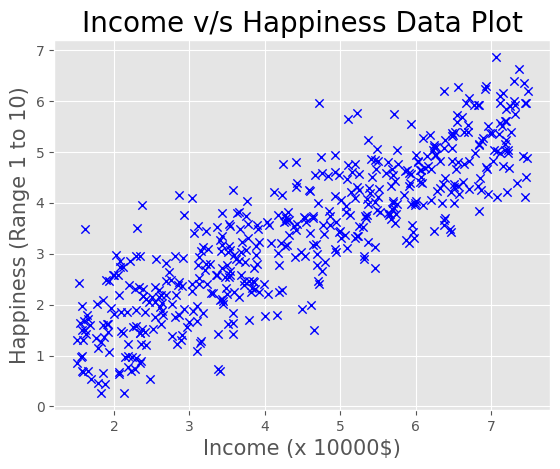

In [7]:
# Reading Data from Files
income_happiness_data = pd.read_csv("/home/friday_code/Desktop/ML/Supervised Models/Regression/Datasets/income_vs_happiness.csv")

# Plotting Traing and Testing Data for Visualisation Purpose
plt.style.use("ggplot")
plt.scatter(income_happiness_data['income'], income_happiness_data['happiness'], alpha = 1, linestyle = 'solid', linewidth = 1, marker = 'x', color = 'blue')
plt.grid(True)
plt.xlabel("Income (x 10000$)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.ylabel("Happiness (Range 1 to 10)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Income v/s Happiness Data Plot", fontdict = {"fontsize": 20, "weight": "medium", "fontname": "Sans Serif"})
plt.show()

In [8]:
# Calculating size of Whole Dataset
shape = income_happiness_data.shape # (498, 3)

# No. of Training Data Rows
training_rows = int(shape[0] * 0.8) # 398

# No. of Testing Data Rows
testing_rows = shape[0] - training_rows # 498 - 398 = 100

# Now we will divide the whole dataset into Training (80%) and Testing (20%)
training_data = income_happiness_data.iloc[:training_rows]
testing_data = income_happiness_data.iloc[training_rows:]

### Mathematical Formulae Used
- Partial Derivative of $J(w, b)$ wrt $w$ keeping $b$ constant
$$
\frac{\partial J(w, b)}{\partial w} = \frac{\partial (\frac{1}{2m}\sum_{i = 1}^{m}{(\hat{y}^{(i)} - y^{(i)})^{2}})}{\partial w} = \frac{1}{2m}\sum_{i = 1}^{m}{(2 w (x^{(i)})^{2} + 2 x^{(i)} b - 2 x^{(i)} y^{(i)})}
$$

- Partial Derivative of $J(w, b)$ wrt $b$ keeping $w$ constant
$$
\frac{\partial J(w, b)}{\partial b} = \frac{\partial (\frac{1}{2m}\sum_{i = 1}^{m}{(\hat{y}^{(i)} - y^{(i)})^{2}})}{\partial b} = \frac{1}{2m}\sum_{i = 1}^{m}{(2 b + 2 w x^{(i)} - 2 y^{(i)})}
$$

In [9]:
# m is no. of training examples
m = training_rows

# Defining function to calculate Cost Function
def Cost_Function(w: float, b: float):
    income_x = training_data['income']
    income_y = training_data['happiness']
    summation = 0
    for i in range(m):
        x = income_x[i]
        y = income_y[i]
        summation += np.power((w * x) + b - y, 2)
    return summation / (2 * m)

# Defining function to calculate Partial Derivative of J wrt w and constant b
def derivative_J_wrt_w(w: float, b: float):
    income_x = training_data['income']
    income_y = training_data['happiness']
    summation = 0
    for i in range(m):
        x = income_x[i]
        y = income_y[i]
        summation += ((2 * w * x * x) + (2 * x * b) - (2 * x * y))
    return summation / (2 * m)

# Defining function to calculate Partial Derivative of J wrt b and constant w
def derivative_J_wrt_b(w: float, b: float):
    income_x = training_data['income']
    income_y = training_data['happiness']
    summation = 0
    for i in range(m):
        x = income_x[i]
        y = income_y[i]
        summation += ((2 * b) + (2 * w * x) - (2 * y))
    return summation / (2 * m)

#### Below is the Contour Plot of Cost Function J(w, b) wrt w and b

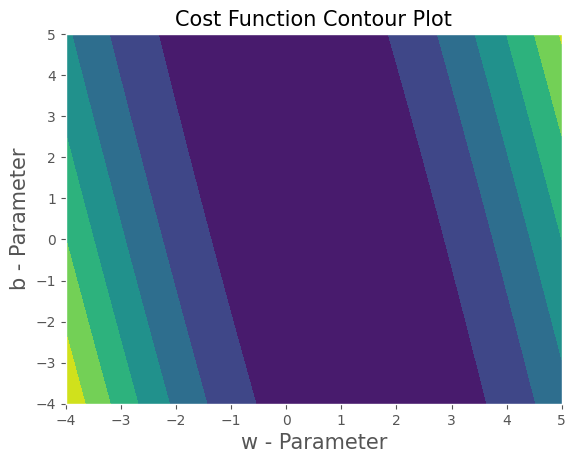

In [10]:
# Values for w in Contour Plot
w = np.linspace(-4, 5, 1000)

# Values for b in Contour Plot
b = np.linspace(-4, 5, 1000)

# Creating MeshGrid
W, B = np.meshgrid(w, b)

# Values for J Cost Function in Contour Plot
J = Cost_Function(W, B)

# Plotting Contour Plot
plt.style.use('ggplot')
plt.contourf(W, B, J, extent=(w.min(), w.max(), b.min(), b.max()))
plt.grid(True)
plt.xlabel('w - Parameter', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.ylabel('b - Parameter', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.title('Cost Function Contour Plot', fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Here, we have taken $\alpha$ or Learning Rate as 0.01, which is a proper fit for our dataset.

In [11]:
# Total no. of Iterations
iterations = 3000

# Defining Alpha or Learning Rate
alpha = 0.01

# Setting up initial values of w and b
w, b = -1, 1

while (iterations != 0):
    temp_w = w - alpha * derivative_J_wrt_w(w, b)
    temp_b = b - alpha * derivative_J_wrt_b(w, b)
    w = temp_w
    b = temp_b
    if (iterations % 300 == 0):
        print(f"Iteration {iterations}: w - {w}, b - {b}, J(w, b) - {Cost_Function(w, b)}")
    iterations-=1

print("Done. \nParameters value found for the best fit Linear Regression Line.")
print(f"Final values for w - {w}, b - {b}")

Iteration 3000: w - -0.6556239005921729, b - 1.0669911830614704, J(w, b) - 16.20001353674944
Iteration 2700: w - 0.5652076376880903, b - 0.9462100503235336, J(w, b) - 0.3040480853715642
Iteration 2400: w - 0.6122128563294452, b - 0.7097446983017981, J(w, b) - 0.28443939120472755
Iteration 2100: w - 0.6440025235010887, b - 0.5498229905494826, J(w, b) - 0.2754707121967881
Iteration 1800: w - 0.6655019009764814, b - 0.44166781097769386, J(w, b) - 0.2713685928785365
Iteration 1500: w - 0.6800419472542146, b - 0.3685223760482289, J(w, b) - 0.2694923541497033
Iteration 1200: w - 0.6898753922458473, b - 0.3190540595773633, J(w, b) - 0.2686341948680093
Iteration 900: w - 0.6965257590023511, b - 0.28559859736264687, J(w, b) - 0.26824168759191447
Iteration 600: w - 0.7010234073884097, b - 0.2629726413598884, J(w, b) - 0.26806216152365003
Iteration 300: w - 0.7040651706091873, b - 0.24767068911803422, J(w, b) - 0.26798004939185155
Done. 
Parameters value found for the best fit Linear Regression L

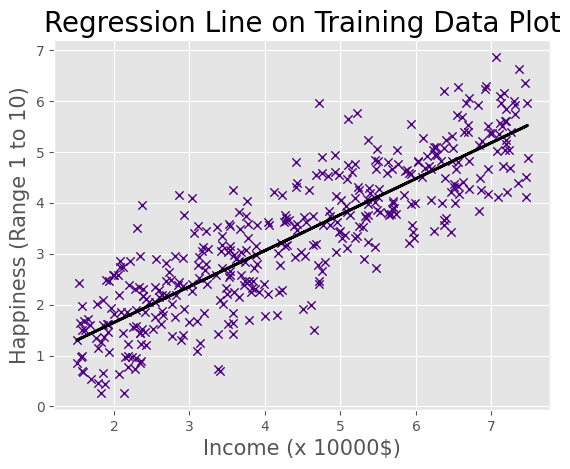

In [12]:
# Regression Line's Y data on Training Data Input Variable X i.e. income
y_data_line = np.array([(w * x + b) for x in training_data['income']])
x_data_line = training_data['income']

# Plotting Linear Regression with Training Graph and Regression Line
plt.style.use("ggplot")
plt.scatter(training_data['income'], training_data['happiness'], alpha = 1, linestyle = 'solid', linewidth = 1, marker = 'x', color = 'indigo')
plt.plot(x_data_line, y_data_line, alpha = 1, linestyle = 'solid', linewidth = 2, color = 'black')
plt.grid(True)
plt.xlabel("Income (x 10000$)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.ylabel("Happiness (Range 1 to 10)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Regression Line on Training Data Plot", fontdict = {"fontsize": 20, "weight": "medium", "fontname": "Sans Serif"})
plt.show()

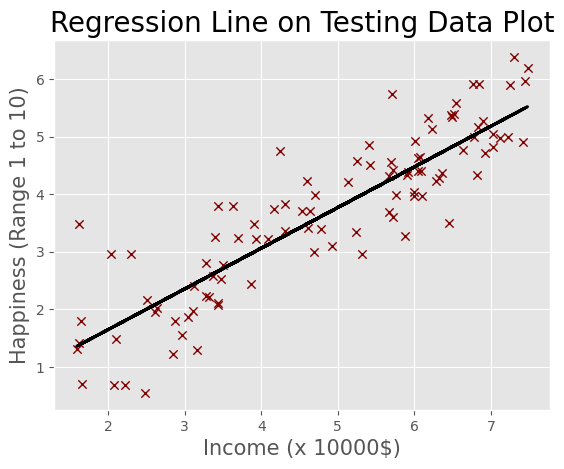

In [13]:
# Regression Line's Y data on Training Data Input Variable X i.e. income
y_data_line = np.array([(w * x + b) for x in testing_data['income']])
x_data_line = testing_data['income']

# Plotting Linear Regression with Testing Graph and Regression Line
plt.style.use("ggplot")
plt.scatter(testing_data['income'], testing_data['happiness'], alpha = 1, linestyle = 'solid', linewidth = 1, marker = 'x', color = 'maroon')
plt.plot(x_data_line, y_data_line, alpha = 1, linestyle = 'solid', linewidth = 2, color = 'black')
plt.grid(True)
plt.xlabel("Income (x 10000$)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.ylabel("Happiness (Range 1 to 10)", fontdict = {"fontsize": 15, "fontname": "Sans Serif"})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Regression Line on Testing Data Plot", fontdict = {"fontsize": 20, "weight": "medium", "fontname": "Sans Serif"})
plt.show()

### Batch Gradient Descent</h5>
- ##### To be more precise, this gradient descent process is called **Batch Gradient Descent**.
- ##### The term Batch Gradient Descent refers to the fact that on every step of gradient descent, we're looking at all of the training examples, instead of just a subset of the training data.
- ##### So in computing gradient descent, when computing derivatives, when computing the sum from i = 1 to m.
- ##### And Batch Gradient Descent is looking at the entire batch of training examples at each update.
- ##### Batch Gradient Descent may not be the most intuitive name, but this is what people in the machine learning community call it
- ##### And then it turns out that there are other versions of gradient descent that do not look at the entire training set, but instead looks at smaller subsets of the training data at each update step.
- ##### But we'll use batch gradient descent for linear regression.